# Pobranie danych
W pierwszej kolejności dokonujemy importu niezbędnych bibliotek. Nastepnie ze strony SDA pobieramy dane weatherHistory.csv, których analizę przeprowadzimy.

In [1]:
import pandas as pd  # Data manipulation
import numpy as np  # Data manipulation
import matplotlib.pyplot as plt  # Visualization
import seaborn as sns  # Visualization

In [2]:
weather_df = pd.read_csv('weatherHistory.csv')
weather_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


# Zapoznanie się z danymi i krótka analiza
Dane zawierają informację pogodowe z miasta Segedyn w Węgrzech z lat 2006-2016.

W danych znajdziemy informację:
- date - zawiera sformatowanę datę, dane pogodowe zostały zebrane w latach 2006-2016 dla pomiarów wykonywanych co godzinę
- summary - zawiera krótką informację o stanie pogody danego dnia (Partly Cloudy, Mostly Cloudy, Overcast, Foggy, Breezy and Mostly Cloudy, Clear, Breezy and Partly Cloudy, Breezy and Overcast, Humid and Mostly Cloudy, Humid and Partly Cloudy, Windy and Foggy, Windy and Overcast, Breezy and Foggy, Windy and Partly Cloudy, Breezy, Dry and Partly Cloudy, Windy and Mostly Cloudy, Dangerously Windy and Partly Cloudy, Dry, Windy, Humid and Overcast, Light Rain, Drizzle, Windy and Dry, Dry and Mostly Cloudy, Breezy and Dry, Rain)
- precip type - zawiera informację o opadach i rodzaju opadów, czy padał deszcz, czy śnieg (rain, snow)
- temperature (C) - zwiera pomiary temperatury wyrażone w stopniach Celsjusza
- apparent temperature - zawiera pomiary wyliczonej temperatury odczuwalnej wyrażone w stopniach Celsjusza
- humidity - zawiera informację o wilgotności danego dnia
- loud cover- zawiera informację o parametrze niskiego zachmurzenia przyjmującego wartości w przedziale od 0 do 1. 
- pressure (millibars) - zawiera pomiary ciśnienia wyrażonego w milibarach.
- daily summary - zawiera krótkie podsumowanie pogody w danym czasie.

## Sprawdzeenie danych

Po wczytaniu danych sparawdzamy jaki mamy typ danych. 

In [3]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


### Sprawdzanie braków w danych

In [4]:
weather_df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [5]:
weather_df['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

W parametrze precic type zaobsorwaliśmy brak 517 wartości.

Precic type informuje nas czy w danym dniu były opady deszczu, bądź śniegu. Zatem w tym przypadku  brak danych inforumje nas o tym, że w tym dniu nie zaobersowano żadnych odpadów.
Brak danych Nan zastępujemy wartością numeryczną 0.

In [6]:
weather_df['Precip Type'] = weather_df['Precip Type'].replace(np.nan, 0)
weather_df['Precip Type'].unique()

array(['rain', 'snow', 0], dtype=object)

### Sprawdzmay ile mamy wartości unikalnych w danych

In [7]:
weather_df.nunique()

Formatted Date              96429
Summary                        27
Precip Type                     3
Temperature (C)              7574
Apparent Temperature (C)     8984
Humidity                       90
Wind Speed (km/h)            2484
Wind Bearing (degrees)        360
Visibility (km)               949
Loud Cover                      1
Pressure (millibars)         4979
Daily Summary                 214
dtype: int64

In [8]:
weather_df['Loud Cover'].unique()

array([0.])

Kolumna Loud Cover zawiera tylko jedną wartość 0 dla wszytskich pomiarów. Zatem nie wniesie ona znaczących informacji do dalszej analizy i możemy się jej pozbyć.

In [9]:
weather_df = weather_df.drop(['Loud Cover'], axis=1)
weather_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.


# Dokonujemy wstępnych operacji na zbiorze danych

##  Transformacja zmiennych kategorialnych 


In [10]:
weather_df['Summary'].unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

W tym kroku dokonujemy transformacji zmiennych kategorialych:
- summary
- precip type.

In [11]:
weather_df['Summary'] = weather_df['Summary'].astype("category")

In [12]:
weather_df['Precip Type'] = weather_df['Precip Type'].astype("category")

In [13]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Formatted Date            96453 non-null  object  
 1   Summary                   96453 non-null  category
 2   Precip Type               96453 non-null  category
 3   Temperature (C)           96453 non-null  float64 
 4   Apparent Temperature (C)  96453 non-null  float64 
 5   Humidity                  96453 non-null  float64 
 6   Wind Speed (km/h)         96453 non-null  float64 
 7   Wind Bearing (degrees)    96453 non-null  float64 
 8   Visibility (km)           96453 non-null  float64 
 9   Pressure (millibars)      96453 non-null  float64 
 10  Daily Summary             96453 non-null  object  
dtypes: category(2), float64(7), object(2)
memory usage: 6.8+ MB


## Zamiana indeksu

W tym kroku dokonujemy zmiany indeksu z liczby porządkowej na  datę.

In [14]:
weather_df.set_index('Formatted Date', inplace=True)

# pd.datetime

In [15]:
weather_df.head(3)

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,
2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.


# Podstawowa statystyka na zbiorze danych 

Wyświetlona poniżej tabela zawiera podstawowe informacje statystyczne takie jak: średnia, odchylenie standardowe, wartości minimalne i maksylane, dolny kwartyl, mediane, górny kwartyl. 

Dzięki temu jesteśmy w stanie przeprowadzić podstawową analizę statystyczną umożliwiającą między innymi wyłapanie wartości odstających.

In [16]:
weather_df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


Nastepnie badamy korelację dannych. 
Współczynnik korelacji przyjmuje wartości z przedziału [-1,1]. Koleracja dodatnia mówi nam, że wraz ze wzrtostem wartości jednej cechy następuje wzrost wartości drugiej cechy. Natomiast korelacja ujemna następuje wtedy, gdy przy wzroście jednej cechy, wartość drugiej maleje. 
Przy wartości korelacji 0 wartości nie są ze sobą skorelowane.

In [30]:
weather_df.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,0.059818
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,1.000000


W następnym kroku tworzymy heatmap, która w sposób graficzny pokazuje które parametry są ze sobą skorelowane.

<AxesSubplot:>

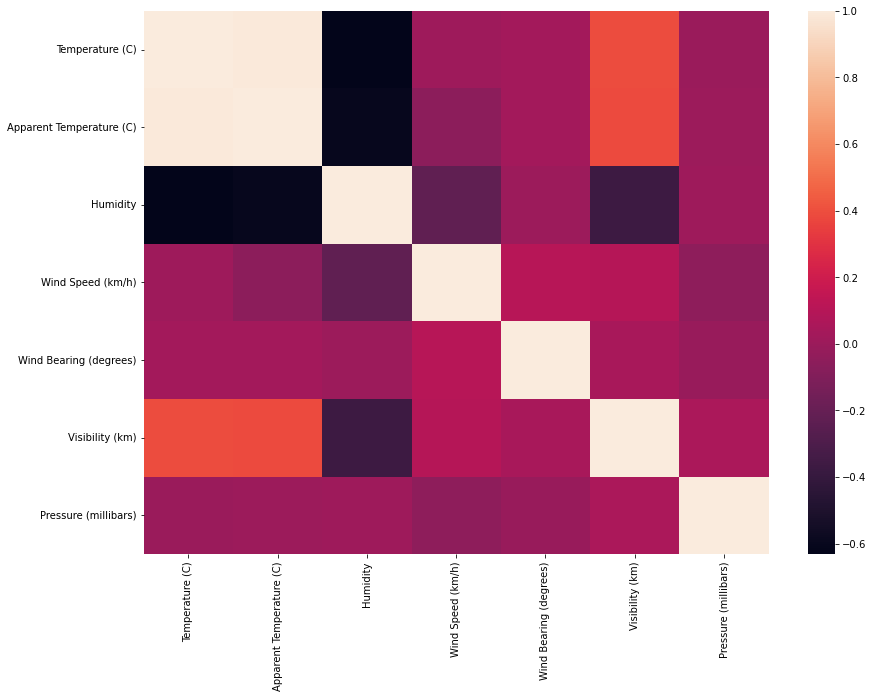

In [31]:
sns.heatmap(corr)

W tak powstałej heatmapie widzimy, że bardzo silnie jest ze sobą skorelowana temperatura z temperaturą odczuwalną. Na poziomie 


#  (preprocessing)
Dummy variable trap

In [18]:
# Dummy variable

# categorical_columns_ls = ['sex','children', 'smoker', 'region']
categorical_columns_ls = weather_df.select_dtypes(
    ["object", "category"]
).columns.to_list()

weather_encoded_df = pd.get_dummies(
    data=weather_df,
    prefix_sep="_",
    columns=categorical_columns_ls,
    drop_first=True,
    dtype="int8",
)

In [19]:
weather_df.head(3)

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,
2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.


In [20]:
weather_encoded_df.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary_Breezy and Dry,Summary_Breezy and Foggy,Summary_Breezy and Mostly Cloudy,...,Daily Summary_Partly cloudy until evening.,Daily Summary_Partly cloudy until morning.,Daily Summary_Partly cloudy until night and breezy in the afternoon.,Daily Summary_Partly cloudy until night and breezy in the morning.,Daily Summary_Partly cloudy until night and breezy starting in the morning continuing until afternoon.,Daily Summary_Partly cloudy until night.,Daily Summary_Rain throughout the day.,Daily Summary_Rain until afternoon.,Daily Summary_Rain until morning.,Daily Summary_Windy in the afternoon.
Formatted Date,,,,,,,,,,,,,,,,,,,,,
2006-04-01 00:00:00.000 +0200,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2006-04-01 01:00:00.000 +0200,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2006-04-01 02:00:00.000 +0200,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2006-04-01 03:00:00.000 +0200,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2006-04-01 04:00:00.000 +0200,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
print(f"Kolumny w oryginalnej ramce danych: {weather_df.columns.values}")
print(f"Liczba wierszy i kolumn w oryginalnej ramce danych: {weather_df.shape}")

print(f"Kolumny w ramce danych po transformacji: {weather_encoded_df.columns.values}")
print(f"Liczba wierszy i kolumn po transformacji: {weather_encoded_df.shape}")

Kolumny w oryginalnej ramce danych: ['Summary' 'Precip Type' 'Temperature (C)' 'Apparent Temperature (C)'
 'Humidity' 'Wind Speed (km/h)' 'Wind Bearing (degrees)' 'Visibility (km)'
 'Pressure (millibars)' 'Daily Summary']
Liczba wierszy i kolumn w oryginalnej ramce danych: (96453, 10)
Kolumny w ramce danych po transformacji: ['Temperature (C)' 'Apparent Temperature (C)' 'Humidity'
 'Wind Speed (km/h)' 'Wind Bearing (degrees)' 'Visibility (km)'
 'Pressure (millibars)' 'Summary_Breezy and Dry'
 'Summary_Breezy and Foggy' 'Summary_Breezy and Mostly Cloudy'
 'Summary_Breezy and Overcast' 'Summary_Breezy and Partly Cloudy'
 'Summary_Clear' 'Summary_Dangerously Windy and Partly Cloudy'
 'Summary_Drizzle' 'Summary_Dry' 'Summary_Dry and Mostly Cloudy'
 'Summary_Dry and Partly Cloudy' 'Summary_Foggy'
 'Summary_Humid and Mostly Cloudy' 'Summary_Humid and Overcast'
 'Summary_Humid and Partly Cloudy' 'Summary_Light Rain'
 'Summary_Mostly Cloudy' 'Summary_Overcast' 'Summary_Partly Cloudy'
 'Summary

## Statystyka
𝐻0  (Null Hypothesis, hipoteza zerowa) — 2 zmienne kategorialne są od siebie niezależne.
𝐻𝐴  (Alternate Hypothesis, hipoteza alternatywna) — 2 zmienne kategorialne są od siebie zależne.
Zakładając 5% poziom istotności:

p_value < 0.05 — mamy podstawy do przyjęcia  𝐻𝐴 , więc to oznacza, że dwie zmienne kategorialne są ze sobą skorelowane.
p_value > 0.05 — nie mamy podstaw do odrzucenia  𝐻0 , więc to oznaczna, że dwie zmienne kategorialne nie są ze soba skorelowane.

In [22]:
import pandas as pd
from scipy.stats import chi2_contingency

p_values = {}
for i in categorical_columns_ls:
    for j in range(len(categorical_columns_ls)):
        _, p, _, _ = chi2_contingency(
            pd.crosstab(weather_df[i], weather_df[categorical_columns_ls[j]])
        )
        p_values[f"{i}:{categorical_columns_ls[j]}"] = p
        print(f"{i} z {categorical_columns_ls[j]}: {p}")


Summary z Summary: 0.0
Summary z Precip Type: 0.0
Summary z Daily Summary: 0.0
Precip Type z Summary: 0.0
Precip Type z Precip Type: 0.0
Precip Type z Daily Summary: 0.0
Daily Summary z Summary: 0.0
Daily Summary z Precip Type: 0.0
Daily Summary z Daily Summary: 0.0


In [23]:
# pd.crosstab(weather_df['Summary'],weather_df['Precip Type'])

In [24]:
for key, value in p_values.items():
    if value<0.05:
        print (key, value)

Summary:Summary 0.0
Summary:Precip Type 0.0
Summary:Daily Summary 0.0
Precip Type:Summary 0.0
Precip Type:Precip Type 0.0
Precip Type:Daily Summary 0.0
Daily Summary:Summary 0.0
Daily Summary:Precip Type 0.0
Daily Summary:Daily Summary 0.0


# Dzielimy dane na zbiór testowy i treningowy

In [25]:
from sklearn.model_selection import train_test_split
X = weather_df.drop('Temperature (C)', axis=1)
y = weather_df['Temperature (C)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_test dimension= ', y_test.shape)

X_train dimension=  (77162, 9)
X_test dimension=  (19291, 9)
y_train dimension=  (77162,)
y_test dimension=  (19291,)


D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


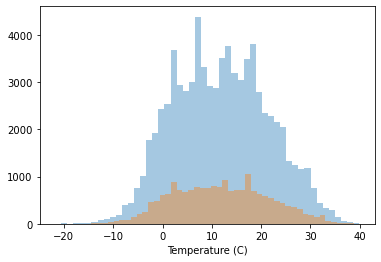

In [26]:
fig, ax = plt.subplots()
for a in [y_train, y_test]:
    sns.distplot(a, ax=ax, kde=False)

# Badanie współliniowości

<AxesSubplot:>

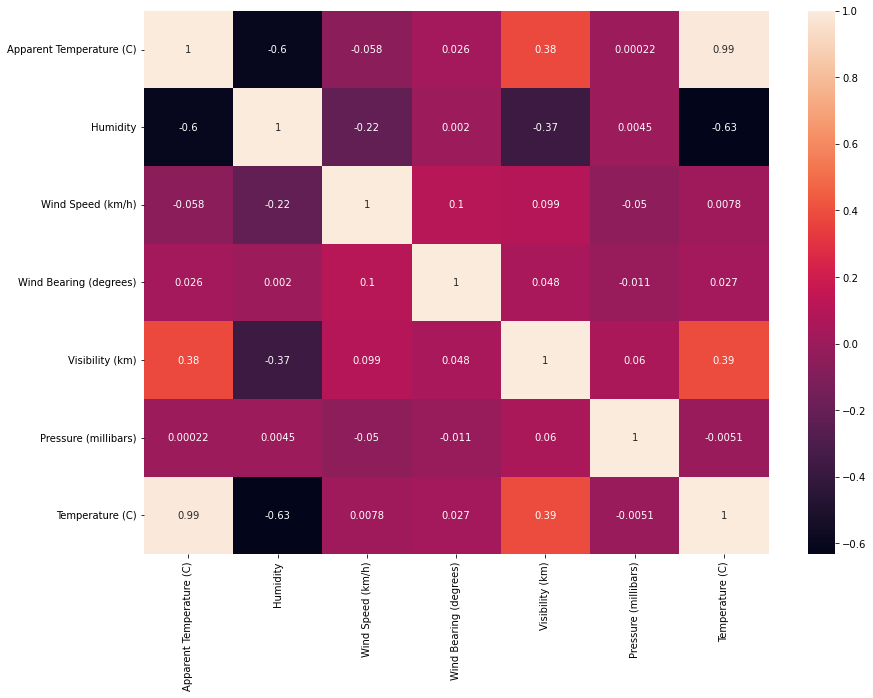

In [27]:
plt.rcParams["figure.figsize"] = [14, 10]

sns.heatmap(X_train.join(y_train).corr(), annot=True)

D:\anaconda\lib\site-packages\seaborn\_core.py:1057: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_col.loc[orig.index] = pd.to_numeric(axis.convert_units(orig))


ValueError: cannot reindex on an axis with duplicate labels

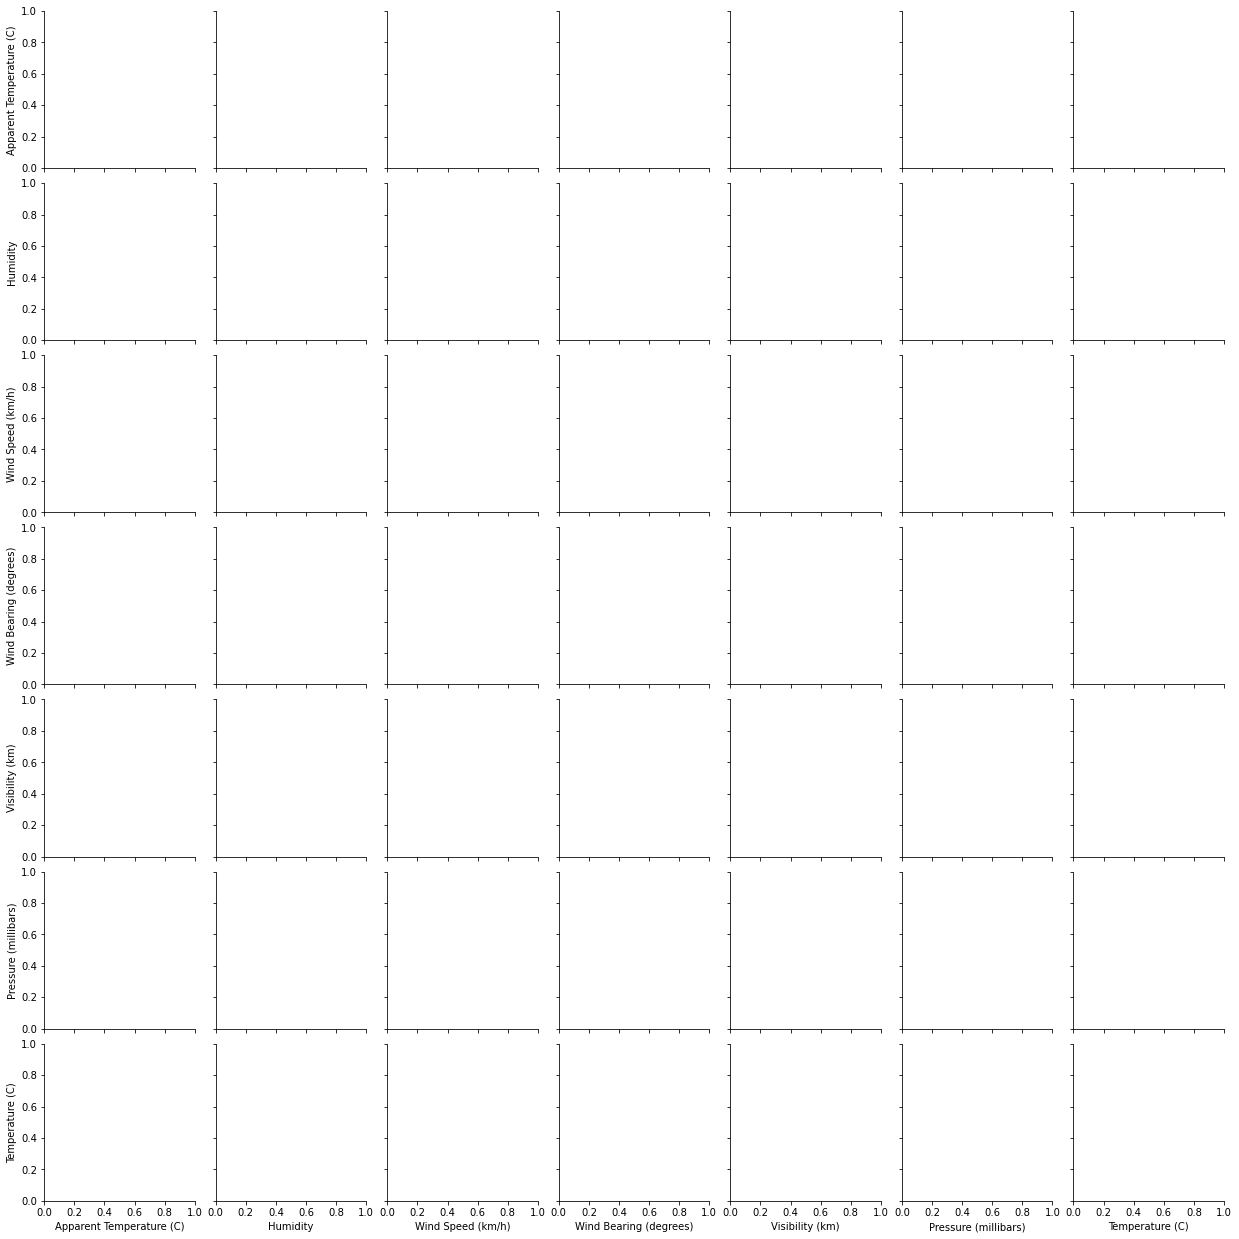

In [28]:
sns.pairplot(data = pd.concat([X,y], axis=1))